In [107]:
import base64
import numpy as np
from PIL import Image
import io
import matplotlib.pyplot as plt

''
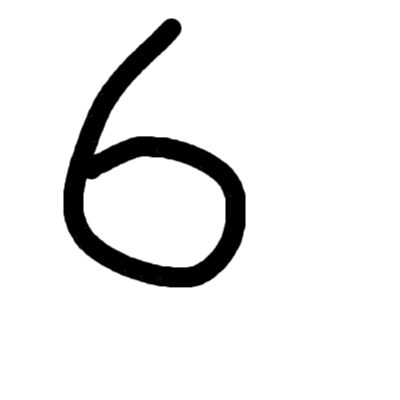

In [108]:
canvas_img = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAZAAAAGQCAYAAACAvzbMAAAAAXNSR0IArs4c6QAAIABJREFUeF7tnQmsFUX2h4uwOKASXMKmZABFWaIoiwqOuwMo+y4ggkJEEAeFGdyjEwVGZpRRjCgOBogKoqxKFB1lyaiIqMCAbApOUESCGzgoGOWfX/1t5vF8S997q/t23/o6uRGh+3TVd+rd36s6p05VOHTo0CHDBQEIQAACEMiQQAUEJENi3A4BCEAAApYAAsJAgAAEIACBrAggIFlh4yEIQAACEEBAGAMQgAAEIJAVAQQkK2w8BAEIQAACCAhjAAIQgAAEsiKAgGSFjYcgAAEIQAABYQxAAAIQgEBWBBCQrLDxEAQgAAEIICCMAQhAAAIQyIoAApIVNh6CAAQgAAEEhDEAAQhAAAJZEUBAssLGQxCAAAQggIAwBiAAAQhAICsCCEhW2HgIAhCAAAQQEMYABCAAAQhkRQAByQobD0EAAhCAAALCGEgsgS+++MJs2bLFbNu2zWzfvt18++23pnr16qZhw4amQYMG5rTTTjO1a9dObPtpGAQKnQACUugeTmH/9u7da1asWGEWLVpkNm3aZHbv3m0kJvv37zfVqlUztWrVMjVr1jSNGzc2nTt3NhdddJEVFi4IQCBeAghIvLx5WzkENNOYM2eOef75583GjRutaJR2SUyaNm1qunbtavr06WNnJFwQgEB8BBCQ+FjzpnIIrF271kybNs0sWLDA7NixIzSvunXrmn79+pnrr78eEQlNjRshkDsBBCR3hlhwQEDiMXnyZCseX375ZcYWJSK33HKLFRGWszLGxwMQyIoAApIVNh5ySSBX8Qjact5555l77rnHdOjQwWXzsAUBCJRCAAFhaOSVgGIemnnMnDkzq5lH0cYrJjJs2DAzduxYsrPy6lVe7gsBBMQXTyewnxIPxTwkHpnEPMrqyhVXXGHuvfdec8455ySwxzQJAoVFAAEpLH+mpjfZBszL6+AZZ5xhl7F69uxZ3q38OwQgkCMBBCRHgDyeOQFXMY+S3nz88cdbAfnDH/6QecN4AgIQyIgAApIRLm7OlYDLmEdJbfnNb35jBeS2227Ltak8DwEIlEMAAWGIxEYgiphH8cZrh7oEZMSIEbH1ixdBwFcCCIivno+531HFPIp3o2XLllZAVOKECwIQiJYAAhItX6wbY6KMeRQH3KVLFysgLVq0gD0EIBAxAQQkYsC+m4865lGUr3agjxo1yowePdrUqFHDd/T0HwKRE0BAIkfs7wt27dplnnrqKfP444872+dRFs327dvbPSDakc4FAQhETwABiZ6xl29QPaunn37a7jL/+OOPI2VQqVIlW0RRMw8VVdSOdC4IQCB6AghI9Iy9e4PEY+HChVY81qxZE3n/f/vb39oiitdee62pU6dO5O/jBRCAwP8TQEAYCU4JKOYxa9YsM3v2bLN582Zz8OBBp/aLGzv55JPN4MGDzZAhQ0z9+vUjfRfGIQCBIwkgIIwIZwTiStUNGly1alUzYMAAWzyxUaNGzvqBIQhAIBwBBCQcJ+4qh0CcqbpBU3SU7d13320uvvhiU7FiRXwEAQjETAABiRl4Ib5uy5Yt5tFHHzXPPvtsziXZw/Jp1aqVGTNmjOnYsaM59thjwz7GfRCAgEMCCIhDmD6a0sxj6tSp9iTBnTt3Ro5Ay1Zt2rSx5360a9eO/R6RE+cFECidAALC6MiaQL6WrTTz0LIVM4+sXceDEHBCAAFxgtE/I3GJR+XKlS3cH3/80e71kHhorwfi4d+Yo8fJI4CAJM8niW7R999/b95++217kuCSJUsij3kEwXHt79Bej6FDh7LXI9EjhMb5RAAB8cnbOfb1008/NXPnzjXPPfecWb9+vdm3b1+OFsM9rpnHoEGDTP/+/dnrEQ4Zd0EgFgIISCyY0/8Sicf06dPtzOOTTz6JrUPKttLMo1OnTsw8YqPOiyAQjgACEo6T13ft3bvXPPPMM2bSpElm69atsbHQzEPVdTXzoLpubNh5EQRCE0BAQqPy80bVtZo/f7557LHHzLp168xPP/0UCwiVKCHmEQtqXgKBrAkgIFmjK/wHJR6qayXx0GbBOMWD+laFP77oYfoJICDp92EkPVDa7AsvvGDGjRtnNmzYEMk7ihpVSfYKFSqYWrVqURwxctq8AAJuCCAgbjgWlBWl6i5dutT87W9/MytWrIhl5qF0XcU8rr76arKtCmo00ZlCJoCAFLJ3s+hbkKqrulZK1d2/f38WVjJ7JChPMnDgQKNTBTnTIzN+3A2BfBFAQPJFPoHvzUeqrsSjS5cuZsSIEebss89mh3kCxwVNgkBpBBAQxoYlIPFQqq72ecSZqktJdgYgBNJLAAFJr++ctVwZVjNmzLA7zLVJMI5sq2DZSjMPVdWltpUzd2IIArERQEBiQ53MF8VZjj0ojKhMKy1b9e3bl2WrZA4LWgWBUAQQkFCYCvOmuCrqip7EQ5lWEg8Fy7XPQ2eYc5JgYY4teuUHAQTEDz//qpdxiodeLqHQ7nKJx5AhQyiK6Om4o9uFRQABKSx/hurN9u3bzeTJk83MmTMjL8ceNIiKuqFcw00QSBUBBCRV7sq9sSpPokwrnWG+Y8eO3A2GsCDxUF0rFUVkj0cIYNwCgZQQQEBS4igXzZR4qDyJZh9xlCdRmymK6MJz2IBAMgkgIMn0i/NW5aMwIstWzt2IQQgkigACkih3RNOYoDDixIkTzbZt2+xLVO9Kf+/6ClJ1mzdvzkFQruFiDwIJI4CAJMwhrpsjkXjnnXfMX/7yF/Paa68ZVb3VdeDAgUg2DCrbqlmzZmbkyJGmd+/eHATl2qHYg0CCCCAgCXKG66Zo2erVV181Tz/9tHnrrbfMN9984/oVv7KnmMfw4cPN0KFDTc2aNSN/Hy+AAATyRwAByR/7SN8cxDymTp1qNm/ebA4ePBjp+2ScmEfkiHkBBBJFAAFJlDvcNEbLVgsXLrSHQa1Zs8aN0XKskKobC2ZeAoFEEUBAEuUON415//33zfjx482LL74Yy8yDVF03fsMKBNJGAAFJm8fKaa8q62qToA6E0jJW1BfLVlETxj4EkksAAUmubzJumQRDMQ9tFPz8888zfj6TB0444QTTpk0b07NnT04RzAQc90KggAggIAXiTB0I9fzzz9syJVHvMpd4XHXVVebaa6+1gXPO8iiQQUQ3IJAhAQQkQ2BJvD04inb69OmxHAilA6DuvfdeOwPhggAE/CWAgKTc99pRLuHQLnOdJhj1pRnHmDFjTL9+/Zh5RA0b+xBIOAEEJOEOKq95y5cvt7OBZcuWlXdrzv9OtlXOCDEAgYIigICk2J06FOrBBx80CxYsMPv27Yu0J2RbRYoX4xBIJQEEJJVuMybOEwVbtWpFYcSUjhOaDYEoCSAgUdKNyHacJwqqqu7NN99sunXrRmHEiPyJWQiklQACkjLPxXmioGIeN910kz3DXKm7XBCAAASKEkBAUjYeVF1XQfO333470pZLPAYPHmzFo379+pG+C+MQgEA6CSAgKfLbrl27bND8iSeeiDRoTsA8RYOCpkIgjwQQkDzCz+TVe/fuNbNnzzaTJk0ymzZtyuTRjO4lVTcjXNwMAa8JICApcL/Ksy9ZssSeKrhy5cpIThIUhlq1atllqxtuuIFlqxSMC5oIgXwTQEDy7YEQ71d59gceeMC89NJLZv/+/SGeyPyWqlWrmr59+5pbb73VNG7cOHMDPAEBCHhHAAFJuMvj2O+hc9Ivv/xyc/vtt5vzzz/f6FxzLghAAALlEUBAyiOUx3+PQzzUvRYtWtiZR6dOnUy1atXy2GNeDQEIpIkAApJQb8W1WVC7zLXXo2PHjuz1SOhYoFkQSCoBBCSBnoljs6CWrZo1a2ZuvPFG07t3b3aZJ3Ac0CQIJJ0AApJAD0WxWVCCUaFCBdvbypUrm7p165qhQ4faQ6Fq1qyZQAo0CQIQSDoBBCRhHtJ+D20W1H6PH3744YjWKZ0326toYFyCcfXVV5sRI0aQrpstUJ6DAAQMApKwQbB69WpbqmTx4sW/yob66aefnLSWEwWdYMQIBLwngIAkaAjoaNrHHnvMnmu+e/fuSFrGiYKRYMUoBLwkgIAkxO1autLRtFq6iupoWsqUJMTZNAMCBUIAAUmAI3Wu+fz58+1u83Xr1kXSourVq5v+/fub0aNHm0aNGkXyDoxCAAJ+EUBAEuDvVatWmfvuu8+8/PLL5qijjjIqK6JLwuKidIkysDp06GBuu+02c95557HTPAE+pwkQKAQCCEievSiRmDx5sv189dVXtlBilSpVbKsOHDhgDh48mHML2WmeM0IMQAACJRBAQPI8LDT7UNbVG2+8YQ4dOuREMIp2qUGDBmbkyJFm0KBB7DTPs695PQQKjQACkkePasf5o48+amcf+rPrS0FznSioT7169Vybxx4EIOA5AQQkTwNAmwIXLlxoxo0bZ9asWRNJK/r06WNnN02aNInEPkYhAAG/CSAgefK/sq0mTJhg5s2b53zZSl3S7OOOO+6ws48gppKnrvJaCECgQAkgIHlwrJarpkyZYpeuotowyOwjD47llRDwjAACkgeHR1EssWg3mjdvbmcf3bp1Y/aRB//ySgj4QgABidnTSttVscSJEyeaffv2OX+7lq50voeWrk444QTn9jEIAQhAICCAgMQ8FoK0XW0adH1JMJSuKwGpX7++a/PYgwAEIHAEAQQkxgGhzCul7SrzKoq03SuvvNJmXbVu3TrGXvEqCEDAVwIISIyeV5FEfcHPmDHD+VubNm1qzzXv1asX55o7p4tBCECgJAIISIzjYs6cOVZANm7c6PStqp01fPhwKyCcLugULcYgAIEyCCAgMQ0PnfUxfvx4e9aHi/pWRZt9zjnnWGG64oorYuoNr4EABCBgOJEwrkGgcu36ks+lXHtwrnnRo20VOFetKwXOybqKy5u8BwIQEAFmIDGMg+3bt9u03ZkzZ+ZUnj0417zo0bYEzmNwIK+AAARKJICARDwwlG2lZStlX+3YscPp27RhUHGPrl27Ejh3ShZjEIBAGAIISBhKOdwT1a7zWrVq2WWrG264gaWrHPzDoxCAQPYEEJDs2ZX7pM45165znXPuetf55ZdfbmMq559/frnt4AYIQAACURBAQKKg+otNlWnXl7zKtru8lLZ78803m7Fjx5oaNWq4NI0tCEAAAqEJICChUWV+43PPPWcFZNOmTZk/XMoTysRS2u5dd91F2q4zqhiCAASyIYCAZEMtxDNavlLmlZav9u/fH+KJcLccc8wxNm33j3/8I7GPcMi4CwIQiIgAAhIR2NWrV9vZx+LFi+0bqlWrZrT0pEsVebMVldNPP93aveqqqyJqOWYhAAEIhCOAgITjlPFdzzzzjP2i37lzp31WezeCkwEPHDiQ9W50pezK7llnnZVxm3gAAhCAgEsCCIhLmr/Y0t4PLV/pxMGff/7ZHDp0KGvBKNo87TQfPXq0Td899thjI2g5JiEAAQiEJ4CAhGcV+s6o9n60a9fOzj7atGkTui3cCAEIQCAqAgiIY7JR7f1o0KCBGTNmjLnmmmuYfTj2GeYgAIHsCCAg2XEr9am3337bzhI0C3F56ZwP2W3WrJlLs9iCAAQgkDUBBCRrdL9+ULMPxT2UuuvyxEHFPrRpUOm7yubiggAEIJAEAgiIQy9s2LDBzhJeeOEFh1aNIfbhFCfGIAABRwQQEEcgZUYlSyQgKmHi6qpevbqNfdxyyy3EPlxBxQ4EIOCEAALiBKOxS1YqnKiy7S4LJyrmcc8995jevXs7ailmIAABCLghgIC44WiD5pp9KIju8mLjoEua2IIABFwSQEAc0IwqdZflKwfOwQQEIBAZAQTEAdqoUndbtWplZzUdO3Z00EpMQAACEHBLAAHJkeePP/5o4x7jxo1zmrqrZg0dOtQKyEknnZRjK3kcAhCAgHsCCEiOTD/66CP7Ja/iiS6vk08+2dx9991myJAhpmLFii5NYwsCEICAEwIISI4YtedDAqI9IC6vTp06WbstW7Z0aRZbEIAABJwRQEByQBnVoVFU3c3BKTwKAQjERgAByQF18UOjcjB1xKOXXHKJnX1ceOGFrkxiBwIQgIBzAghIDkgV9/jzn/9stm7dmoOVIx/V7GPUqFH2zI8aNWo4s4shCEAAAq4JICBZEo1q+ercc8+1s48OHTpk2TIegwAEIBAPAQQkS86qd6UvetW/cnkNGDDAli5p1KiRS7PYggAEIOCcAAKSJdK5c+daAVm/fn2WFn79mFJ3VbZdqbv5LtuuGZYyy/TZtWuX3ePy/fffZ9xXLcmpX7Vr1zY6FKthw4ZGO+y5IACB9BNAQLL04ZQpU6yA7N69O0sLv36se/fu1uaZZ57pzGYYQxKL7du3m23btlmx+PTTT82OHTsOf7755htbIPLgwYNhzB1xj85ul4gonlOrVi1Ts2bNUOKoZwLxad26tRWhypUrZ/x+HoAABKIjgIBkwVZfsOPHjzfTpk3L6ku1pFfqt3LNPlS2Pa7ZRzDLWLJkiVm5cqX54osvjMRCsw2XFYWzQGxL1wfic8opp5izzjrLKDtN/2UGkw1RnoGAewIISBZM58+fb2cK69aty+Lpkh+Js2y7hEMxHAnHW2+9ZT788EOnMylnUIoYOvHEE02TJk1M/fr1rcBWrVrVzlC0NCZ2+iAsUZDHJgRKJ4CAZDg6FAeYOHGi/ezfvz/Dp4+8PfjC0xd61GXbg9nG2rVrbdxG4ifhcHn0bk4wMnz4qKOOMsccc4w57rjj7PKWZiaXXXaZadOmjRUWLghAIHoCCEiGjD/44AM7+1i0aFGGTxr7W3OwPBUEpA8dOmRUkFGnDt55551OTx0MYhsKhL/77rt21vHJJ5/Y2Uau4pdx5yN+QMtdp59+ujnttNNsnIXZScTAMQ8BYwwCkuEwmDNnjhWQjRs3ZvikMVWqVDH6zVnXgQMHDsdP9IWn1N0RI0ZkbLOkByRIml1oqU2xjSAgnu+4hpPOhTBSfHYSLHFplsJSVwiA3AKBkAQQkJCgdJuWex555BEzefJk8/XXX2fwZNm3KutKAtKjR4+cbAYzDonGK6+8YuMbLrPEcmpcHh/WrE8irfgJS115dASvLjgCCEgGLtWxtffdd589tvann37K4Mmyb80l/lE0BVe1ud577z2jEvOadWSTduusUwk1FCx16bAuCYqWugjCJ9RZNCvxBBCQkC6K6tjabCvvlpSCK9FIa1A8pBuc3aZZSZAqTBDeGVYMeUYAAQnp8Cgq72pj3O9//3tz11132eyhMFfR+Mby5ctTkYIbpl/5vkebHBWAVwVkHSFMrCTfHuH9aSCAgIT0Ui7B89JeoXV5ZV8NHz48VPaVZhdaRlNbiG+EdFzI2xR4V0ac0oK130QC0rZtW3PBBReYevXqhbTCbRDwiwACEtLfCp4r+yofwXMJh+IuEo9ly5aZzZs3pza+UalSJVOhQgWbupzkS0tcipHoREjFS1ROhVlJkj1G2/JBAAEJQV1fdvfff78ZN26c0+B5r169rCjpi6mkq6hwaMaxZcuWvJcYCYGrzFu0+U/Xd999l6upWJ7XzEQzxaCcCpsVY8HOS1JCAAEJ4ShtvtMX/YwZM0LcHe6WsmpfFaJwBFRUkkTXnj17woFK0F1BBpfiVe3atWPXe4J8Q1PyQwABCcE9itpX+hKSKOmLqOilqrizZs0y8+bNK4gZR3G8WhpSrCGb0vAhXBXLLYGQtG/fnoB7LMR5SVIJICDleCaKkwdV0mTkyJHm1ltvtfsQipYceeONN2ysQym5hXoVrQGW5j4qc0sBdzYnptmLtD0XAghIOfSiSN9VzabRo0cbHV+rMziCDYC+lBwphFlI0WETzEh0nku/fv3swVlcEPCBAAJSjpenT59ul5r+85//OBsPOq62adOm5ocffrBncLAB0BnavBpSuu+ll15qlyVJ/82rK3h5TAQQkDJA6+CoSZMmmaeeesoetOTqCiryFlpFXFd80mwnSP+VgPTu3dsG2uM6ICzN3Gh7OgkgIGX4TRv2JkyYYHd7+15XSrEaLc3oo7RjHeRU0qV4jtKNtTQXzK70d75dWtZq0aKFFZEuXbqwGdG3AeBJfxGQUhyts8ElHo8//ri34qEaUSrtoSDxSSeddPhMcy3V6Izzki7Nqnbu3GmrAAfH44aZaQXCo7NLJECFUNOrYsWKdjOi9o507tyZtF9PvlR96iYCUoq3//nPf9rYx5tvvunTeLBZYaoJpVmGll/OO++8w8fIRgkiEB4tG27atMlWFZaYaCbz1VdfJX7nellsCLJHOXKwnU8CCEgJ9LXz/OGHH7Y7z13GPvLp6LLerbRaLU1JOCQYWnrRLKNOnTp5Wb8vKiZaBtNBWCqfrz8HoqL9MmmbpYhpt27dzHXXXWdndVwQSDsBBKQED3722Wd29vGPf/wj7f4ts/1aolKNJ800dKhV3bp1rXCUtjyVbxgSc2WsSUh05okOzpKgSEj0SUOsRTvxlaWldF/Ob8/3iOL9uRJAQEogqGUrCYiWsQrx0jKVvrw6depk96JonT6polEaf81Sgn0zqqu1detWu59GhSY1O0mymLCkVYg/VX72CQEpwe9RlG5PwvAKZhy/+93vzEUXXWSXrPRlVghXMDtRAF+zE1UvXrFiRaJ39Gu2p9mIlrWYjRTCKPSvDwhICT6fMmWKnYEUwnniEg0JRcOGDe2XlOIbaZxxZPKjqdmJCmCuW7fOLnEFH81YklaDi9lIJp7l3qQRQEBK8IjSdyUgad77oXpbEow+ffqYM844w6bg5isonq9Br8B7MDOReKxZs8a8/PLL9r9JExIC7PkaJbw3FwIISDF62v8h8XjiiSdy4ZrXZ5VRpc1rPXr0MGeffXbBLFPlClWBds1K9Hn33XftqY76O2XdlSYoEmJdcQiOAuwDBw60hTY1Y+SCQNIJICDFPJTW/R9F92+ojIY2AOq3Wm1m4zqSQLDEJQFR5eN//etf5vPPPy8RU5BcEFc6t3x2zTXXmCFDhlCUkYGbeAIISBEXpXH/h4RDR64qGJvv/RuJH+3FGqj9JcraUrD9nXfeKTGDKx8HYLGclbaR5G97EZAivk/b/g8Fx7Wf4Morr7SB8rSl4iblx65oBpdmI8rCUzkVXfkqPS/h6tq1q13OYtNhUkYK7ShOAAEpQiQt+z+CfRw9e/Y0OhVPwXEuNwSUBqxlrblz59pUYMVI8nUAFjERNz7FSnQEEJAibJO+/6PoclWh7eOIbohnbrn40lZQPiWOQHrx1mo5S7MQxUTkfy4IJIkAAlLEG4888ojNwPr666+T5CNTdAOgNgGyXBWPe4KlrVWrVpkFCxYcnpHE8/b/vaVt27bmnnvusXEuLggkiQAC8os3VPrivvvuswdIaf9Avi8fNwDmm3lp7y86I1m4cOHhfSRKuojj0mZD7VbXMcjEQ+IgzjvCEkBAfiEVxdnnYZ1Q9L7gDA6dIdG4cWMvNwBmwy2OZzQjef/99+1s5MUXX7S73eO6iIfERZr3ZEIAAfmFVhLiH1qaGjRokP1tU+VGOAo1k6Ecz72anapY4+uvv25eeuklW8Ax2IwYdQuIh0RNGPuZEkBAfiGW7/iHZh7XX3+9GTp0KFlVmY7iPNwfLGvNmzfPzJo1K7bZiJaw7rjjDvtLRuXKlfPQc14Jgf8RQEB+KVOh+MfEiRPzEv8IZh79+/e3Mw+u9BDQMtazzz5rZsyYcXjvSJStP+qoo0z37t3N7bffbs9w4YJAPgkgIMaYDz74wGZfLVq0KFZfaH+BSo5cddVV5tJLL2XmESt9dy8rae+IO+u/tqTCmDfffLMZMWLE4T0qUb4P2xAojQACYozdeSwB2bhxo7ORovIiWm7Q+rgqwWrd/Ntvv7W5/FrL1kf3aCNgkyZNiHc4I58fQ8GSluIiWtIKdrJH1RotYSm1l6ysqAhjNwwBBMQYM336dPPnP//Z2Tq2ZhajRo2yAXF9sezZs8eeLaIifkrJVEZNICRsDgszTNNzj2YjixcvNk8++aSt+BvVpeOHhw0bZuNmtWvXjuo12IVAmQQQEGPMgw8+aAVEX/YurmbNmtnfDnv37u3CHDZSRkDpvhKRhx9+ODIRUYae0ry1lKUlUALqKRskBdJc7wVEGwi1fKUNhK6uXr16WZsSEi4/CUhElixZYmciKhvvugyKgukq1d+xY0dz1113EVD3c5jlvdfeC0gUGwjHjh1rZyDs48j7+M5rAzSjXbZsmXnooYfsf6O4FFBXWu/w4cOZhUQBGJssYZVFIIoAumYfEhAuCEhElOY7efLkIwLrLsugDBgwwI63Ro0aARwCsRLwfgbiegOhjkCVgGgWwgUBEVBgXYkaWs5SRp4ul/XWlIklAVFmFhcE4iTgvYDcf//99gvf1Q+0zuaQPWXHcEEgIKANh9OmTbMp4xIRlzGRk046yY45VTHggkCcBLwXEGVf6YfP1dWyZUv722Dnzp1dmcROgRDYunWr+fvf/26XtFyesa5Y2y233GJnvcHhVwWCjG4knIDXAhJFBlbfvn2tICnFkgsCRQlolqty8Jr1qvqBy0vZWPrFpXXr1i7NYgsCZRLwWkDIwOKnI24CmoVo1vvMM884fbUC6BIQBdS5IBAXAa8FxHUGFgH0uIZtet+jagQzZ860hTtV3sbVpWUsHX2rZSyqG7iiip3yCHgtIFOmTLHLTSoz4uIigO6CYuHb2LZtmxUQCYnLYDpH3xb+2ElaD70WkAkTJlgBOXjwoBO/qLy2lhF69OjhxB5GCpOAYiGzZ8+2sZBNmzY566TqrCmYPmbMGILpzqhiqCwCXguI6wwsSpjwwxaWwJo1a2wsRMfjurxUf02/xFBGxyVVbJVGAAFxmMJLCRN+0MIS0A511V9TIU9lA7q62FToiiR2whBAQBwKCCVMwgw57gkIPP/883YWsmHDBqMEDF25xkRq1qxpl2UKCRJjAAAW5ElEQVRVG4sLAlETQEAQkKjHGPZLIVB0GatKlSr2rkqVKh0WE2VsZSooqtKrJSwdecsFgagJICAISNRjDPulENAyloosqlqvTq7UJQEIxOTAgQNZJXgwE2bIxUUAAUFA4hprvKcEAsuXL7fLWEuXLnXGBwFxhhJD5RBAQBAQfkjySEA1sSQgqpHl6kJAXJHETnkEEBAEpLwxwr9HTMB1OjkCErHDMH+YAAKCgPDjkGcCCEieHcDrsyaAgCAgWQ8eHnRDAAFxwxEr8RNAQBCQ+EcdbzyCAALCgEgrAQQEAUnr2C2YdiMgBeNK7zqCgCAg3g36pHUYAUmaR2hPWAIICAISdqxwX0QEEJCIwGI2cgIICAIS+SDjBWUTQEAYIWklgIAgIGkduwXTbgSkYFzpXUcQEATEu0GftA4jIEnzCO0JSwABQUDCjhXui4gAAhIRWMxGTgABQUAiH2S8gBgIY6AwCSAgDgVE51GrDlH16tULc7TQq0gIMAOJBCtGYyCAgDgUkI4dO9rDfFq3bh2D63hFoRBAQArFk/71w2sBmThxop0xZHrqW2nDpEmTJtZenz59/BtJ9DhrAghI1uh4MM8EvBaQqVOn2i/8zz//3IkbOI/aCUbvjCAg3rm8YDrstYDMmzfPHuazbt06Jw7VcaQjR46051GfcMIJTmxipPAJICCF7+NC7aHXArJhwwY7A3nhhRec+bdt27Y2DtKuXTtnNjFU2AQQkML2byH3zmsB2b9/v52BKBbi6jr22GONsrHGjBlDNpYrqAVuBwEpcAcXcPe8FhD5ddy4cVZEfvzxR2du7t27t52FNGvWzJlNDBUuAQSkcH1b6D3zXkAee+wxKyC7d+925uuzzjrLCki3bt2c2cRQ4RJAQArXt4XeM+8FxHUgXQOGbKxC/7Fx2z8ExC1PrMVHwHsBWbNmjZ2BLFiwwBl1ZWMpDqJsLHalO8NasIYQkIJ1bcF3zHsB2bdvn5k8ebJ56KGHzJdffunM4RdccIFdxrrsssuc2cRQ4RHYu3evzQScNGmSs87JnsYeFwSiJuC9gAjw8uXL7Sxk6dKlzngrG2vIkCFm9OjRpl69es7sYqiwCGgGrC/8hQsXOusYAuIMJYbKIYCAGGO++eYbm4318MMPO83Gat68uf1NsHv37gxECJRIYO7cuVZA1q9f74wQAuIMJYYQkHBjIIpsrGrVqtmd6WPHjmVnejg3eHfXlClTrIC4ygKsVKmStXfnnXd6x5IOx0+AGcgvzKPIxpJpVebVLESVerkgUJSA4h8TJkyw8beDBw86gaMMQI23ESNGOLGHEQiURQAB+YWOq2wszTqqVq1qrQZVfq+55hrzpz/9yTRs2JDRCIHDBFavXm1nC4sXL3ZG5cwzz7QC0qNHD2c2MQSB0gggIL+QcZWNpRTeKlWqWKsHDhwwhw4dskH0YcOG2aA6RRb5YQwIzJkzxwrIxo0bnUHp2rWrtanNrFwQiJoAAlKE8CuvvGKzsVauXOmMe8WKFa2tc889lyKLzqgWhiHX8Q/tOVINNu1BUhYgFwSiJoCAFCG8detWKyDPPfecqVChgtOMLP1A33DDDTatt3bt2lH7FfsJJxBF/EO117R8pVpsXBCIgwACUoSyqvPOnDnTPPjgg2b79u3mp59+cuqDU0891dx4441m4MCBLGU5JZs+Y1HEP3r16mWXryjimb7xkNYWIyDFPLdt2zZb3l1C4uqo26Kv0Nr0HXfcYQstVq5cOa3jhnbnSCCK+IfSxTUDUSIHFwTiIICAFKOsWcdrr71m7r//fvPmm2869YEEQwH2Dh062DpZLVu2dGofY+kgoOUrzXJVvkTJGy4u9n+4oIiNTAkgICUQ08501cfSznSX9bGCgPpxxx1nTyy87rrrTJs2bfiNMdNRm/L7ozgJk/0fKR8UKW0+AlKK49566y0bUH/jjTecB9T1SgXVW7RoYQOeXbp0oV5WSn+Asmn2q6++amMVb7/9djaPl/gM+z+cocRQBgQQkFJgaWnh2WeftbOQLVu2GO3vCDYIKtjuIj6iGUn9+vXN4MGDzaBBgxCRDAZuWm/VyZdPPfWUrb22Y8cOZ91g/4czlBjKgAACUgasnTt32oD61KlTzc8//3zEBkFXpSf0eomIamZJSNhomMHoTeGt69ats+VLVDrH1Rhi/0cKB0KBNBkBKceRy5Yts0tZ+m+Ul7KzJCLKzkJEoiSdP9sKnmvzoGpfuSqeqN6cdtppNvuqf//++escb/aSAAJSjtu1lKVsGWXN6AsgqktLZPoiUDxE+fzK5SfNNyra+bEbxd4P9eTCCy+0AnLppZfmp2O81VsCCEgI1y9ZssTOQlwGPUt7ba1atWxmVp8+fWymFrOREA5KwS3K5tPsQ9l9Lmcf6vqAAQOsgDRq1CgFJGhiIRFAQEJ4Uz/8WnZ49NFHI52FBE0JZiPXXnut6devH6VPQvgo6beo4q4yrzQLcXnpFwxtINTyJxsIXZLFVhgCCEgYSsbYAouahajgYlyXSp+o7Ik+DRo0iOu1vMcxgU8//dQ88MADZtq0aU6y94o2T5tRNfvo3Lmz41ZjDgLlE0BAymdk71Dq7oIFC8xf//pXo7ND4rpUCl6BdW06pER3XNTdvmf+/Pl29qEMLNdX3759re3GjRu7No09CJRLAAEpF9H/btBSlkRES1mBiBQ/PCoDc6FvPfHEE80ll1xil7MUMCUuEhpd3m9UUc6gtpp+CXF5KV5266232rNmWL5ySRZbYQkgIGFJ/XKfRGTGjBlWRPTlUKNGDfsvKn8S5aUvCGVpXXDBBTa4rkA7QhIl8dxta6xo2UpjxeWmwaBlV1xxhZ19nHPOObk3FgsQyIIAApIFtKIVe48++mhrYc+ePVlYyvwRlUA5/fTTTffu3e2MhNhI5gzjeiKKkiVB2+V3HR6l45I5PCouj/Ke4gQQkCzGhCr2Ll261JajWLVqlT221kVpk0yaotiIZiKKjzAbyYRcPPfu2rXL7h164oknnFXcLdpyzv6Ix4+8pWwCCEiWI0QbDLU/5PHHHzfr16+3AhLlRsOSmhnMRiQgLGtl6cgIHtPS1dNPP233fHz88cfO36DZh1J3Nfsg9uEcLwYzIICAZACr+K0Skffff9+89NJLZtGiRbboYj6u448/3sZHLrvsMtOxY0e7i131kbjiJ6BiiQsXLrSzU9fZejrzQ4KhpUsFz1m+jN+/vPFIAghIjiNCy1kKpms2ouB68KWhL5K4ruCcEWVrNWnSxKb7SkxY2orLA/97j36hGD9+vHnxxRedFUsMrMvPF110kT3R8uKLLzaB3+PvJW+EwP8TQEAcjQRlYan8uzJuNBNxfZ56Js1kaSsTWu7uld/lf40DlweRBS0kcO7OV1hyQwABccPRWlH5d6VtPvnkk5GkbWba1EBI2rdvz9JWpvAyvH/t2rW27L/2CWkcRHFx5kcUVLGZCwEEJBd6JTz7ySefWBHRclYUuf/ZNFcbzljayoZcuGe0hKmA+cyZMyOZeagV2vMzevRoc9NNN5G2G84t3BUDAQQkAsgSES1jSETyFVgvqVsE2907W+KhXxgkHlH+wqAsO20aVFyLCwJJIYCAROQJLWNoI9ncuXNtGfgo1sQzbTrB9kyJlX2/lq0kHlq2ilI8lGGnTYPKvmLToFsfYi03AghIbvzKfFppvps3bzZz5swxs2fPjvRLJptuaGlLX06qr0X6b2YEow6YB62Rj66//nozfPhwU6dOncwayd0QiJgAAhIxYJlP6pKWzh3RLvrjjjvOxkhUIuXkk0+2549oLwn7SUoeHHEEzIM3U+8qhh9QXpE1AQQka3SZPZjEJa3iPZCgHHPMMVZQJCQSkLZt29p1d/0/R+waI/FQwFzLVlEvS5K2m9nPGHfHTwABiZF5sKSlneuzZs1KVIC9JAza9Vy/fn27zKVP8+bNTdOmTU3Dhg293Okep3jomACVKmHHeYw/oLwqYwIISMbIcn8gmI2oXtJbb70VeyHGbHqg4K0KOOqj5S6fdrqrxpkqDCjTKo6Zh/yjHed33303O86zGaw8ExsBBCQ21Ee+SLORf//737aOljK1kpTuWx6SYINiq1at7AxFolKIMxMJhzLodIzxe++9Zz788MPIl63EXlyVdaXEBrKuyhuN/Hs+CSAg+aT/y+71pKX7hkWiJS59wWmTm0REYlIoQXjt71D23Lx588zGjRsjKcleEmctFY4aNcr079//8GFlYf3BfRCImwACEjfxEt6XtthIacgKIQivwLhmHVqqkrBHub+jOEeJr1J2hw4dSspuAn4uaUL5BBCQ8hnFdkcaMrUygVE0CK9ZSjBbSWKacCAcEg3FpXQglIQ9rjNeFDQfMGCAPeejUaNGmWDmXgjkjQACkjf0Jb84mI2sWLHC/ga8evXqWNbd48BQ0gxFqcIqP5+vPScSiA0bNpjFixfbWIdiUfKBxC/OkyYJmscxAnmHawIIiGuijuypPLx2sb/55pv2gKJ33303FdlamXRfX9I1a9Y8HIgv7XQ9zV700RJP69ats96TIrFQbEOCoaUpzTo009CfFSDfvXu3bb5mA7qiPqZYB0RVqFDBpkcTNM9k5HBvUgggIEnxRCntkJAoW2vZsmXm5ZdftumkUX+xJQ2Jlr6C5a9TTjnFiom+fDO99u/fb0UiEA/NNPR3xa8aNWrYvxL7KC/VJlPQfOTIkQTNowSN7cgIICCRoXVrWL8tr1u3zh6hKzFJSoFGt71MhrWjjz7aNuS///2v8wYFu/l1YiVBc+d4MRgzAQQkZuC5vi7XjK1g2STOI3dz7XPczwdVi6M4VTKwrZnUoEGD7MxD6c9cEEgjAQQkjV7LYf+Ial3p+u6771La8/Q3WxsFla7bqVMn0nXT706ve4CApNj9RTO23nnnHRsc3rZtW5kxkhNPPNH2eM+ePSnueTqbruC8ClMOGzbM6ICoINaSzt7QaggYg4AUwChQsFeBYX1UcqOsYHvc6akFgNdJFxTv6NKli+nbt685++yzKVHihCpG8k0AAcm3Bxy/v2iwXUJSUrHG6tWr27fGtUnOcRdTYy4ImOtQqMGDB9uP4h1BHCQ1HaGhECiFAAJSoEMjKNb4+uuv/2pGkssshCB8+AEjodDMY+DAgWbIkCEEy8Oj486UEEBAUuKobJsZzEiUAqzNiNpHoviHZh/Z7CchCB/eExIPzToQj/DMuDNdBBCQdPkr69Zqw5yO1tXns88+s/tIVq1aZeMmmSxlEYQP5wJtECRNNxwr7kovAQQkvb7LuuVFxUSlPVR3Sx+V9SjvymX5q7jtQlwOU5+UpnvdddeRplveYOLfU08AAUm9C3PrgMTk448/NitXrrQzEqUBf/HFF2XOTFwF4QttOUxLVjoEqmfPnrZmF2m6uY1Nnk4+AQQk+T6KpYUSEpWTV60opQVrT4kqAUtQNEtRLCW4XM1CCmU5LJh1XH311aZDhw5kWsUyYnlJEgggIEnwQgLbEOwt0Wzko48+sjMUBeAlJpnETMrqmishyic+Zh35pM+7800AAcm3B1Lwfs1OFGxXAF7ZXKXNTLLpiqvlsGzene0zarPOL1GsQ0tVbdu2ZdaRLUyeSzUBBCTV7ou/8UVnJlruUkaXBCVsEL54i9M2C1F2Ve/evc3ll19uVBBRmwSrVKkSvyN4IwQSQAABSYAT0tyEbILwaeyvziBRHSsFyNu3b08RxDQ6kTY7J4CAOEfqp8HiQXgF3fV3iqEERR6LB+OTTkpLVQ0aNLCHPp133nlGx87qzzrcigsCEKCYImMgYgIlLXmtXbvWrF+/3mZ26ZPNjvgomq1sKs00GjZsaGMcOqv91FNPNXXr1jX16tUjLTcK6NhMNQFmIKl2X/oaH2xiVFBe9bp0LsmBAweO6IiyvLZs2RJqT0ouBCQWmmHoI8E46aST7OxCcQ0JRp06dUxp57Tn8l6ehUChEEBACsWTBdSP0pbDXHcxEIuaNWsyw3ANF3teEEBAvHAznYQABCDgngAC4p4pFiEAAQh4QQAB8cLNdBICEICAewIIiHumWIQABCDgBQEExAs300kIQAAC7gkgIO6ZYhECEICAFwQQEC/cTCchAAEIuCeAgLhnikUIQAACXhBAQLxwM52EAAQg4J4AAuKeKRYhAAEIeEEAAfHCzXQSAhCAgHsCCIh7pliEAAQg4AUBBMQLN9NJCEAAAu4JICDumWIRAhCAgBcEEBAv3EwnIQABCLgngIC4Z4pFCEAAAl4QQEC8cDOdhAAEIOCeAALinikWIQABCHhBAAHxws10EgIQgIB7AgiIe6ZYhAAEIOAFAQTECzfTSQhAAALuCSAg7pliEQIQgIAXBBAQL9xMJyEAAQi4J4CAuGeKRQhAAAJeEEBAvHAznYQABCDgngAC4p4pFiEAAQh4QQAB8cLNdBICEICAewIIiHumWIQABCDgBQEExAs300kIQAAC7gkgIO6ZYhECEICAFwQQEC/cTCchAAEIuCeAgLhnikUIQAACXhBAQLxwM52EAAQg4J4AAuKeKRYhAAEIeEEAAfHCzXQSAhCAgHsCCIh7pliEAAQg4AUBBMQLN9NJCEAAAu4JICDumWIRAhCAgBcEEBAv3EwnIQABCLgngIC4Z4pFCEAAAl4QQEC8cDOdhAAEIOCeAALinikWIQABCHhBAAHxws10EgIQgIB7AgiIe6ZYhAAEIOAFAQTECzfTSQhAAALuCSAg7pliEQIQgIAXBBAQL9xMJyEAAQi4J4CAuGeKRQhAAAJeEEBAvHAznYQABCDgngAC4p4pFiEAAQh4QQAB8cLNdBICEICAewIIiHumWIQABCDgBQEExAs300kIQAAC7gkgIO6ZYhECEICAFwQQEC/cTCchAAEIuCeAgLhnikUIQAACXhBAQLxwM52EAAQg4J4AAuKeKRYhAAEIeEEAAfHCzXQSAhCAgHsCCIh7pliEAAQg4AUBBMQLN9NJCEAAAu4JICDumWIRAhCAgBcEEBAv3EwnIQABCLgngIC4Z4pFCEAAAl4QQEC8cDOdhAAEIOCeAALinikWIQABCHhBAAHxws10EgIQgIB7AgiIe6ZYhAAEIOAFAQTECzfTSQhAAALuCSAg7pliEQIQgIAXBBAQL9xMJyEAAQi4J4CAuGeKRQhAAAJeEEBAvHAznYQABCDgngAC4p4pFiEAAQh4QQAB8cLNdBICEICAewIIiHumWIQABCDgBQEExAs300kIQAAC7gkgIO6ZYhECEICAFwQQEC/cTCchAAEIuCeAgLhnikUIQAACXhBAQLxwM52EAAQg4J4AAuKeKRYhAAEIeEEAAfHCzXQSAhCAgHsCCIh7pliEAAQg4AUBBMQLN9NJCEAAAu4JICDumWIRAhCAgBcEEBAv3EwnIQABCLgngIC4Z4pFCEAAAl4QQEC8cDOdhAAEIOCeAALinikWIQABCHhBAAHxws10EgIQgIB7AgiIe6ZYhAAEIOAFAQTECzfTSQhAAALuCSAg7pliEQIQgIAXBBAQL9xMJyEAAQi4J4CAuGeKRQhAAAJeEEBAvHAznYQABCDgngAC4p4pFiEAAQh4QQAB8cLNdBICEICAewIIiHumWIQABCDgBQEExAs300kIQAAC7gkgIO6ZYhECEICAFwQQEC/cTCchAAEIuCeAgLhnikUIQAACXhBAQLxwM52EAAQg4J4AAuKeKRYhAAEIeEEAAfHCzXQSAhCAgHsCCIh7pliEAAQg4AUBBMQLN9NJCEAAAu4JICDumWIRAhCAgBcEEBAv3EwnIQABCLgngIC4Z4pFCEAAAl4Q+D8MvtzXXfrI3QAAAABJRU5ErkJggg=="
canvas_img

In [109]:
content = canvas_img.split(';')[1]
image_encoded = content.split(',')[1]
image_bytes = io.BytesIO(base64.b64decode(image_encoded))
img = Image.open(image_bytes)
img = img.resize((28,28), Image.ANTIALIAS)
img

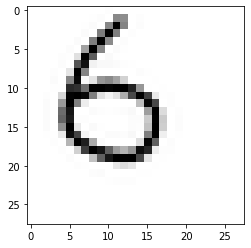

In [114]:
plt.imshow(img, cmap="gray")


In [116]:
img.save("img1.png")

In [111]:
img_arr = np.array(img)
print(img_arr)

[[[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 ...

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]]
